# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

Максимальный балл за задание - 11.
Балл, который ставится в ведомость - min(10,ваш балл).

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


***Код для пунка А***

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [184]:
X = df.iloc[:,:-1]
y = df['Churn']
X.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [185]:
ord_enc = OrdinalEncoder(cols=['International plan', 'Voice mail plan'])
X = ord_enc.fit_transform(X, y)
X.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,1,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,1,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,1,2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,2,2,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,2,2,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [186]:
trg = TargetEncoder(cols=['State', 'Area code'])
X = trg.fit_transform(X, y)
X.head()

/Users/aleksandrakozevnikova/opt/anaconda3/lib/python3.8/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/Users/aleksandrakozevnikova/opt/anaconda3/lib/python3.8/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.185714,128,0.142598,1,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0.128205,107,0.142598,1,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0.264706,137,0.142598,1,2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0.128205,84,0.145585,2,2,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0.147541,75,0.142598,2,2,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [187]:
y[y == False] = 0
y[y == True] = 1
y.value_counts(normalize = True)

<ipython-input-187-dcd32c2e938e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == False] = 0


0.0    0.855086
1.0    0.144914
Name: Churn, dtype: float64

In [192]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

ss = StandardScaler() 
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

model = LogisticRegression(max_iter = 10000, C = 1) 
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000)

In [191]:
from sklearn.model_selection import GridSearchCV

params = {'C': np.arange(0.1,1.1,0.1)} # от 0.1 до 1.1 с шагом 0.1
grid = GridSearchCV(model, params)

grid.fit(X, y)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

best score: 0.8655883769826799
best params: {'C': 1.0}


In [193]:
pred_train_lr = model.predict(X_train)
pred_test_lr= model.predict(X_test)
print('accuracy:', accuracy_score(y_train,pred_train_lr), accuracy_score(y_test,pred_test_lr))
print('f1_score:',f1_score(y_train,pred_train_lr), f1_score(y_test,pred_test_lr))
print('roc_auc_score:',roc_auc_score(y_train,pred_train_lr), roc_auc_score(y_test,pred_test_lr))

accuracy: 0.8632661808829832 0.871
f1_score: 0.3529411764705882 0.3451776649746193
roc_auc_score: 0.6102769144560496 0.610122022681052


***Код для пункта B***

In [194]:
from sklearn.svm import SVC
np.random.seed(123)

ss = StandardScaler() 
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [195]:
svm = SVC(kernel='linear') 
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [236]:
from sklearn.model_selection import cross_validate

scores_lr_train = []
scores_lr_test = []

for c in np.arange(0.1, 10, 1):
    lr = LogisticRegression(C=c)
    
    cv_lr_train = cross_validate(lr,X_train, y_train, cv=5, scoring=('f1'))['test_score']
    cv_lr_test = cross_validate(lr,X_test, y_test, cv=5, scoring=('f1'))['test_score']
    scores_lr_train.append(cv_lr_train.mean())
    scores_lr_test.append(cv_lr_test.mean())

In [237]:
print('f1_score:',max(scores_lr_train), max(scores_lr_test))

f1_score: 0.3372631771908518 0.34000419023674844


In [238]:
from sklearn.model_selection import cross_validate

scores_lr_train = []
scores_lr_test = []

for c in np.arange(0.1, 10, 1):
    lr = LogisticRegression(C=c)
    
    cv_lr_train = cross_validate(lr,X_train, y_train, cv=5, scoring=('accuracy'))['test_score']
    cv_lr_test = cross_validate(lr,X_test, y_test, cv=5, scoring=('accuracy'))['test_score']
    scores_lr_train.append(cv_lr_train.mean())
    scores_lr_test.append(cv_lr_test.mean())

In [239]:
print('accuracy:',max(scores_lr), max(scores_lr_test))

accuracy: 0.8201751411197256 0.874


In [240]:
from sklearn.model_selection import cross_validate

scores_lr_train = []
scores_lr_test = []

for c in np.arange(0.1, 10, 1):
    lr = LogisticRegression(C=c)
    
    cv_lr_train = cross_validate(lr,X_train, y_train, cv=5, scoring=('roc_auc'))['test_score']
    cv_lr_test = cross_validate(lr,X_test, y_test, cv=5, scoring=('roc_auc'))['test_score']
    scores_lr_train.append(cv_lr_train.mean())
    scores_lr_test.append(cv_lr_test.mean())

In [241]:
print('roc_auc_score:',max(scores_lr), max(scores_lr_test))

roc_auc_score: 0.8201751411197256 0.8400621363148769


***Код для пункта С***

In [202]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('logit', LogisticRegression())])
logit_pipe.fit(X_train, y_train)
y_pred_train = logit_pipe.predict(X_train)
y_pred_test = logit_pipe.predict(X_test)
print('accuracy:', accuracy_score(y_train,y_pred_train), accuracy_score(y_test,y_pred_test))
print('f1_score:',f1_score(y_train,y_pred_train), f1_score(y_test,y_pred_test))
print('roc_auc_score:',roc_auc_score(y_train,y_pred_train), roc_auc_score(y_test,y_pred_test))

accuracy: 0.9309901414487785 0.922
f1_score: 0.7407407407407407 0.6694915254237288
roc_auc_score: 0.8189282165634532 0.7814966736755025


/Users/aleksandrakozevnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***Код для пункта D***

In [203]:
df.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [204]:
del df['Total day minutes']
del df['Total eve minutes']
del df['Total night minutes']
del df['Total intl charge']
del df['Area code']
del df['Total night calls']

In [205]:
df.corr()

,Account length,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night charge,Total intl minutes,Total intl calls,Customer service calls,Churn
Account length,1.000000,-0.004628,0.038470,0.006214,0.019260,-0.006745,-0.008960,0.009514,0.020661,-0.003796,0.016541
Number vmail messages,-0.004628,1.000000,-0.009548,0.000776,-0.005864,0.017578,0.007663,0.002856,0.013957,-0.013263,-0.089728
Total day calls,0.038470,-0.009548,1.000000,0.006753,0.006462,-0.021449,0.022927,0.021565,0.004574,-0.018942,0.018459
Total day charge,0.006214,0.000776,0.006753,1.000000,0.015769,0.007036,0.004301,-0.010157,0.008032,-0.013427,0.205151
Total eve calls,0.019260,-0.005864,0.006462,0.015769,1.000000,-0.011423,-0.002056,0.008703,0.017434,0.002423,0.009233
Total eve charge,-0.006745,0.017578,-0.021449,0.007036,-0.011423,1.000000,-0.012601,-0.011043,0.002541,-0.012987,0.092786
Total night charge,-0.008960,0.007663,0.022927,0.004301,-0.002056,-0.012601,1.000000,-0.015214,-0.012329,-0.009277,0.035496
Total intl minutes,0.009514,0.002856,0.021565,-0.010157,0.008703,-0.011043,-0.015214,1.000000,0.032304,-0.009640,0.068239
Total intl calls,0.020661,0.013957,0.004574,0.008032,0.017434,0.002541,-0.012329,0.032304,1.000000,-0.017561,-0.052844
Customer service calls,-0.003796,-0.013263,-0.018942,-0.013427,0.002423,-0.012987,-0.009277,-0.009640,-0.017561,1.000000,0.208750


In [206]:
df.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night charge,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,No,Yes,25,110,45.07,99,16.78,11.01,10.0,3,1,0.0
1,OH,107,No,Yes,26,123,27.47,103,16.62,11.45,13.7,3,1,0.0
2,NJ,137,No,No,0,114,41.38,110,10.30,7.32,12.2,5,0,0.0
3,OH,84,Yes,No,0,71,50.90,88,5.26,8.86,6.6,7,2,0.0
4,OK,75,Yes,No,0,113,28.34,122,12.61,8.41,10.1,3,3,0.0


In [207]:
X = df.iloc[:,:-1]
y = df['Churn']
X.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night charge,Total intl minutes,Total intl calls,Customer service calls
0,KS,128,No,Yes,25,110,45.07,99,16.78,11.01,10.0,3,1
1,OH,107,No,Yes,26,123,27.47,103,16.62,11.45,13.7,3,1
2,NJ,137,No,No,0,114,41.38,110,10.30,7.32,12.2,5,0
3,OH,84,Yes,No,0,71,50.90,88,5.26,8.86,6.6,7,2
4,OK,75,Yes,No,0,113,28.34,122,12.61,8.41,10.1,3,3


In [212]:
ord_enc = OrdinalEncoder(cols=['International plan', 'Voice mail plan'])
X = ord_enc.fit_transform(X, y)
trg = TargetEncoder(cols=['State'])
X = trg.fit_transform(X, y)
X.head()

/Users/aleksandrakozevnikova/opt/anaconda3/lib/python3.8/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/Users/aleksandrakozevnikova/opt/anaconda3/lib/python3.8/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night charge,Total intl minutes,Total intl calls,Customer service calls
0,0.185714,128,1,1,25,110,45.07,99,16.78,11.01,10.0,3,1
1,0.128205,107,1,1,26,123,27.47,103,16.62,11.45,13.7,3,1
2,0.264706,137,1,2,0,114,41.38,110,10.30,7.32,12.2,5,0
3,0.128205,84,2,2,0,71,50.90,88,5.26,8.86,6.6,7,2
4,0.147541,75,2,2,0,113,28.34,122,12.61,8.41,10.1,3,3


In [213]:
y[y == False] = 0
y[y == True] = 1
y.value_counts(normalize = True)

0.0    0.855086
1.0    0.144914
Name: Churn, dtype: float64

In [216]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

ss = StandardScaler() 
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

model = LogisticRegression(max_iter = 10000, C = 0.7000000000000001) 
model.fit(X_train, y_train)

LogisticRegression(C=0.7000000000000001, max_iter=10000)

In [215]:
from sklearn.model_selection import GridSearchCV

params = {'C': np.arange(0.1,1.1,0.1)} # от 0.1 до 1.1 с шагом 0.1
grid = GridSearchCV(model, params)

grid.fit(X, y)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

best score: 0.8661885273579426
best params: {'C': 0.7000000000000001}


In [217]:
pred_train_lr = model.predict(X_train)
pred_test_lr= model.predict(X_test)
print('accuracy:', accuracy_score(y_train,pred_train_lr), accuracy_score(y_test,pred_test_lr))
print('f1_score:',f1_score(y_train,pred_train_lr), f1_score(y_test,pred_test_lr))
print('roc_auc_score:',roc_auc_score(y_train,pred_train_lr), roc_auc_score(y_test,pred_test_lr))

accuracy: 0.8632661808829832 0.87
f1_score: 0.34496919917864477 0.3434343434343434
roc_auc_score: 0.6067349685738053 0.6095446554755094


***Обьединение пунктов C и D***

In [218]:
logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('logit', LogisticRegression())])
logit_pipe.fit(X_train, y_train)
y_pred_train = logit_pipe.predict(X_train)
y_pred_test = logit_pipe.predict(X_test)
print('accuracy:', accuracy_score(y_train,y_pred_train), accuracy_score(y_test,y_pred_test))
print('f1_score:',f1_score(y_train,y_pred_train), f1_score(y_test,y_pred_test))
print('roc_auc_score:',roc_auc_score(y_train,y_pred_train), roc_auc_score(y_test,y_pred_test))

accuracy: 0.9309901414487785 0.922
f1_score: 0.7373572593800979 0.6694915254237288
roc_auc_score: 0.8142056220537942 0.7814966736755025


/Users/aleksandrakozevnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*первое значение метрики на train, второе на test

***Пункт А:***  
accuracy: 0.8632661808829832, 0.871  
f1_score: 0.3529411764705882, 0.3451776649746193  
roc_auc_score: 0.6102769144560496, 0.610122022681052  
Стоит обратить внимание на метрику f1, так как accuracy завышает качество модели ввииду несбалансированных данных, roc__auc также завышает качество модели.  
Логистическая регрессия, даже с подобранным гиперпараметром, имеет достаточно плохо качество. Переоббучения практически нет. 

***Пункт B:***  
accuracy: 0.8201751411197256 0.874  
f1_score: 0.3372631771908518 0.34000419023674844  
roc_auc_score: 0.8201751411197256 0.8400621363148769   
Если, опять же, обратить свое внимание на метрику f1, то можно скзаать, что метод опорных векторов не помог улучшить качество модели. Переобучения нет. 

***Пункт C:***  
accuracy: 0.9309901414487785 0.922  
f1_score: 0.7407407407407407 0.6694915254237288  
roc_auc_score: 0.8189282165634532 0.7814966736755025   
Если увеличить число признаков с помощью добавления полиномиальных признаков второй степени, то можно увидеть, что качессто модели сильно улучшилось. Имеется небольшое переобучение. 

***Пункт D:***  
accuracy: 0.8632661808829832 0.87  
f1_score: 0.34496919917864477 0.3434343434343434  
roc_auc_score: 0.6067349685738053 0.6095446554755094  
Если построить матрицу корреляций признаков, удалить признаки, которые практически не коррелируют с целевой переменной('Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl charge'), а также удалить признаки из каждой пары, которые имеют сильную корреляцию в паре с другими признаками ('Area code','Total night calls') и применить логистическую дегрессиию, то можно заметить, что качество модели не улучшилось. Переобучения практически нет. 

***Обьединение пунктов C и D:***  
accuracy: 0.9309901414487785 0.922  
f1_score: 0.7373572593800979 0.6694915254237288  
roc_auc_score: 0.8142056220537942 0.7814966736755025  
Если же увеличить число признаков с помощью добавления полиномиальных признаков второй степени в новой матрице, которую мы получили в пункте D, то это поможет улучшить качество модели, но оно будет чуть ниже, чем в пункте С. Имеется небольшое переобучние, но оно немного снизилось, по сравнению с пунктом С. 

## Часть 2. Оценка качества моделей классификации (6 баллов).

**Задание 0 (1 балл)**. Закончите определения, начинающиеся так:

    * accuracy - это доля правильных ответов алгоритма: 𝒂𝒄𝒄𝒖𝒓𝒂𝒄𝒚(𝒂,𝑿) = 1/𝒏*sum[𝒂(𝒙𝒊) = 𝒚𝒊] или   
    accuracy(a,X)=(TP+TN)/(TP+TN+FP+FN)
    
    * точность (precision) - это доля правильных ответов алгоритма: precision(a,X) = TP/(TP+FP)
    
    * полнота (recall) - это доля правильных ответов алгоритма: recall(a,X) = TP/(TP+FN)
    
    * TPR - это доля верно принятых обьектов положительного класса. TRP = TP/(TP+FN)
    
    

_______________________________________________________________________________________________

В этой части вы будете работать с данными в задаче скоринга. За работу с этими данными можно получить **5 баллов.**

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [220]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [221]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [24]:
X = df.iloc[:,:]
y = df['target']
y.value_counts(normalize=True)

0    0.554427
1    0.445573
Name: target, dtype: float64

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [245]:
print('accuracy 1:',accuracy_score(df['pred1_classes'],df['target']))
print('accuracy 2:',accuracy_score(df['pred2_classes'],df['target']))
print('accuracy 3:',accuracy_score(df['pred3_classes'],df['target']))

accuracy 1: 0.6618287373004355
accuracy 2: 0.6719883889695211
accuracy 3: 0.6400580551523948


Наибольшую accuracy имеет 2 алгоритм. 

**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [250]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('precision 1:',precision_score(df['pred1_classes'],df['target']))
print('recall 1:',recall_score(df['pred1_classes'],df['target']))

print('precision 2:',precision_score(df['pred2_classes'],df['target']))
print('recall 2:',recall_score(df['pred2_classes'],df['target']))

print('precision 3:',precision_score(df['pred3_classes'],df['target']))
print('recall 3:',recall_score(df['pred3_classes'],df['target']))

precision 1: 0.4364820846905538
recall 1: 0.6907216494845361
precision 2: 0.7296416938110749
recall 2: 0.6103542234332425
precision 3: 0.3485342019543974
recall 3: 0.6903225806451613


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [251]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [263]:
print('confusion_matrix 1:\n', confusion_matrix(df['pred1_classes'],df['target']))
print('confusion_matrix 2:\n', confusion_matrix(df['pred2_classes'],df['target']))
print('confusion_matrix 3:\n', confusion_matrix(df['pred3_classes'],df['target']))

confusion_matrix 1:
 [[322 173]
 [ 60 134]]
confusion_matrix 2:
 [[239  83]
 [143 224]]
confusion_matrix 3:
 [[334 200]
 [ 48 107]]


Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [294]:
rec1 = 0
t1 = 0
for t in np.arange(0, 1, 0.01):
    pred1 = (df['pred1_probs']>t) * 1
    if accuracy_score(df['target'], pred1) >= 0.65:
        if recall_score(df['target'], pred1) > rec1:
            rec1 = recall_score(df['target'], pred1)
            t1 = t
            
rec2 = 0
t2 = 0
for t in np.arange(0, 1, 0.01):
    pred2 = (df['pred2_probs']>t) * 1
    if accuracy_score(df['target'], pred2) >= 0.65:
        if recall_score(df['target'], pred2) > rec2:
            rec2 = recall_score(df['target'], pred2)
            t2 = t
            
rec3 = 0
t3 = 0
for t in np.arange(0, 1, 0.01):
    pred3 = (df['pred3_probs']>t) * 1
    if accuracy_score(df['target'], pred3) >= 0.645: # при 0.65 порог3 = 0
        if recall_score(df['target'], pred3) > rec3:
            rec3 = recall_score(df['target'], pred3)
            t3 = t

In [293]:
print('Порог 1:', round(t1, 2), 'recall 1:', rec1)
print('Порог 2:', round(t2, 2), 'recall 2:', rec2)
print('Порог 3:', round(t3, 2), 'recall 3:', rec3)

Порог 1: 0.36 recall 1: 0.742671009771987
Порог 2: 0.3 recall 2: 0.8371335504885994
Порог 3: 0.26 recall 3: 0.6091205211726385


**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

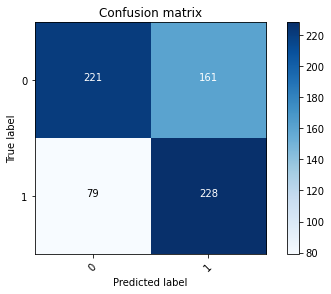

In [295]:
cm = confusion_matrix(df['target'], (df['pred1_probs'] > t1) * 1)
plot_confusion_matrix(cm, [0,1])

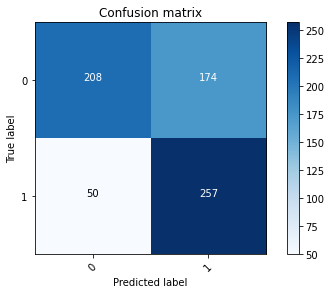

In [296]:
cm = confusion_matrix(df['target'], (df['pred2_probs'] > t2) * 1)
plot_confusion_matrix(cm, [0,1])

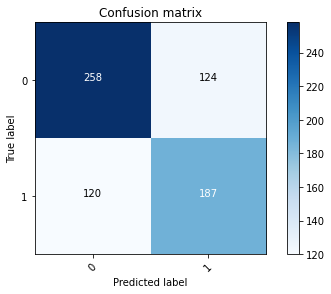

In [297]:
cm = confusion_matrix(df['target'], (df['pred3_probs'] > t3) * 1)
plot_confusion_matrix(cm, [0,1])

**Выводы:** Лучше всего справилась с задачей 2 модель.

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [300]:
pr1 = 0
t1 = 0
for t in np.arange(0, 1, 0.01):
    pred1 = (df['pred1_probs']>t) * 1
    if accuracy_score(df['target'], pred1) >= 0.65:
        if precision_score(df['target'], pred1) > pr1:
            pr1 = precision_score(df['target'], pred1)
            t1 = t
            
pr2 = 0
t2 = 0
for t in np.arange(0, 1, 0.01):
    pred2 = (df['pred2_probs']>t) * 1
    if accuracy_score(df['target'], pred2) >= 0.65:
        if precision_score(df['target'], pred2) > pr2:
            pr2 = precision_score(df['target'], pred2)
            t2 = t
            
pr3 = 0
t3 = 0
for t in np.arange(0, 1, 0.01):
    pred3 = (df['pred3_probs']>t) * 1
    if accuracy_score(df['target'], pred3) >= 0.645: # при 0.65 порог3 = 0
        if precision_score(df['target'], pred3) > pr3:
            pr3 = precision_score(df['target'], pred3)
            t3 = t

In [301]:
print('Порог 1:', round(t1, 2), 'precision 1:', pr1)
print('Порог 2:', round(t2, 2), 'precision 2:', pr2)
print('Порог 3:', round(t3, 2), 'precision 3:', pr3)

Порог 1: 0.54 precision 1: 0.7371794871794872
Порог 2: 0.73 precision 2: 0.8367346938775511
Порог 3: 0.4 precision 3: 0.6649214659685864


**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

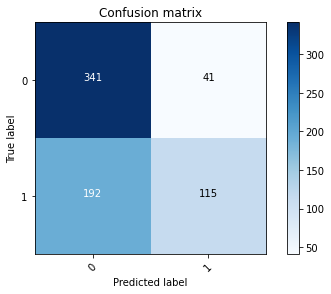

In [302]:
cm = confusion_matrix(df['target'], (df['pred1_probs'] > t1) * 1)
plot_confusion_matrix(cm, [0,1])

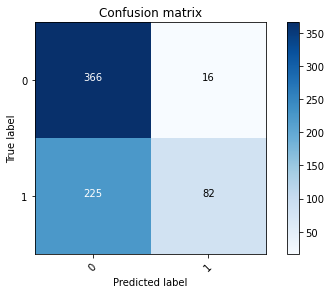

In [304]:
cm = confusion_matrix(df['target'], (df['pred2_probs'] > t2) * 1)
plot_confusion_matrix(cm, [0,1])

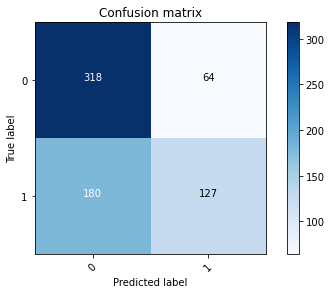

In [305]:
cm = confusion_matrix(df['target'], (df['pred3_probs'] > t3) * 1)
plot_confusion_matrix(cm, [0,1])

**Выводы:** Лучше всего справилась с задачей 2 модель.

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [320]:
f1_1 = 0
t1 = 0
for t in np.arange(0, 1, 0.01):
    pred1 = (df['pred1_probs']>t) * 1
    if accuracy_score(df['target'], pred1) >= 0.65:
        if f1_score(df['target'], pred1) > f1_1:
            f1_1 = f1_score(df['target'], pred1)
            t1 = t
            
f1_2 = 0
t2 = 0
for t in np.arange(0, 1, 0.01):
    pred2 = (df['pred2_probs']>t) * 1
    if accuracy_score(df['target'], pred2) >= 0.65:
        if f1_score(df['target'], pred2) > f1_2:
            f1_2 = f1_score(df['target'], pred2)
            t2 = t
            
f1_3 = 0
t3 = 0
for t in np.arange(0, 1, 0.01):
    pred3 = (df['pred3_probs']>t) * 1
    if accuracy_score(df['target'], pred3) >= 0.645: # при 0.65 порог3 = 0
        if f1_score(df['target'], pred3) > f1_3:
            f1_3 = f1_score(df['target'], pred3)
            t3 = t

In [321]:
print('Порог 1:', round(t1, 2), 'f1 1:', f1_1)
print('Порог 2:', round(t2, 2), 'f1 2:', f1_2)
print('Порог 3:', round(t3, 2), 'f1 3:', f1_3)

Порог 1: 0.36 f1 1: 0.6551724137931035
Порог 2: 0.32 f1 2: 0.6990291262135923
Порог 3: 0.26 f1 3: 0.6051779935275081


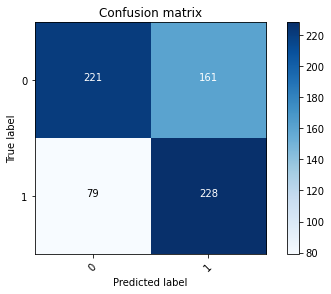

In [308]:
cm = confusion_matrix(df['target'], (df['pred1_probs'] > t1) * 1)
plot_confusion_matrix(cm, [0,1])

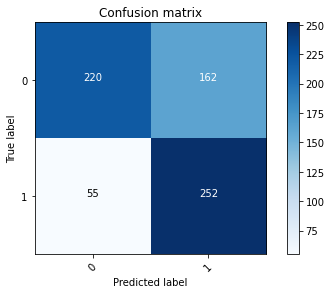

In [309]:
cm = confusion_matrix(df['target'], (df['pred2_probs'] > t2) * 1)
plot_confusion_matrix(cm, [0,1])

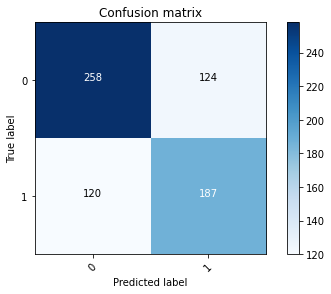

In [310]:
cm = confusion_matrix(df['target'], (df['pred3_probs'] > t3) * 1)
plot_confusion_matrix(cm, [0,1])

**Выводы:** Лучше всего справилась с задачей 2 модель.

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [326]:
X = df.iloc[:,:-7]
y = df['target']

ss = StandardScaler() 
X = ss.fit_transform(X)

model = LogisticRegression() 
model.fit(X, y)

log_pred = model.predict_proba(X)
log_pred

array([[0.95862144, 0.04137856],
       [0.9273138 , 0.0726862 ],
       [0.98765636, 0.01234364],
       ...,
       [0.41258241, 0.58741759],
       [0.06977917, 0.93022083],
       [0.93246985, 0.06753015]])

**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [328]:
rec = 0
t1 = 0
for t in np.arange(0, 1, 0.01):
    pred = (log_pred[:, 1] > t) * 1
    if accuracy_score(df['target'], pred) >= 0.65:
        if recall_score(df['target'], pred) > rec:
            rec = recall_score(df['target'], pred)
            t1 = t
            
pr = 0
t2 = 0
for t in np.arange(0, 1, 0.01):
    pred = (log_pred[:, 1] > t) * 1
    if accuracy_score(df['target'], pred) >= 0.65:
        if precision_score(df['target'], pred) > pr:
            pr = precision_score(df['target'], pred)
            t2 = t
            
f1 = 0
t3 = 0
for t in np.arange(0, 1, 0.01):
    pred = (log_pred[:, 1] >t) * 1
    if accuracy_score(df['target'], pred) >= 0.645: # при 0.65 порог3 = 0
        if f1_score(df['target'], pred) > f1:
            f1 = f1_score(df['target'], pred)
            t3 = t

In [329]:
print('Порог 1:', round(t1, 2), 'recall:', rec)
print('Порог 2:', round(t2, 2), 'precision:', pr)
print('Порог 3:', round(t3, 2), 'f1:', f1)

Порог 1: 0.05 recall: 0.9869706840390879
Порог 2: 0.96 precision: 0.9764705882352941
Порог 3: 0.52 f1: 0.8685897435897436


***Выводы:*** Логистическая регрессия справилась с задачей намного лучше, чем три готовые модели, предсказания которых мы анализировали выше.